# ASSIGNMENT 2

# Group No: 11

**1. AKSHAT KADIA(202203029)**

**2. GUNJAN SETHI(202312112)**

**3. JAYDEEP DARJI(202411029)**

**github_link** = " https://github.com/akshat-11004/IT-462-EDA-Group11 "

# Data Loading and Exploring

In [1]:
# Load the Dataset form google sheets
import pandas as pd
import missingno as msno
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1dSbI5PO0CTmFJl6rxYYsIRof5Fx9AZhqqBAcdEmAdQ4/export?format=csv')
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18340\1005004001.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,FL_DATE,AIRLINE,DEST_CITY,DEP_TIME,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY,CANCELLATION_CODE,ELAPSED_TIME,AIR_TIME,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_LATE_AIRCRAFT
0,6/3/2023,Delta Air Lines Inc.,"San Francisco, CA",1608.0,27.0,9.0,1853.0,24.0,NaN,285.0,249.0,0.0,8.0,215.0
1,23-02-2020,Spirit Air Lines,"Dallas/Fort Worth, TX",1838.0,15.0,14.0,2040.0,-1.0,NaN,182.0,153.0,NaN,NaN,NaN
2,31-07-2019,Southwest Airlines Co.,"Oklahoma City, OK",1237.0,15.0,3.0,1331.0,141.0,NaN,54.0,36.0,141.0,0.0,0.0
3,11/6/2023,American Airlines Inc.,"Boston, MA",1001.0,23.0,8.0,1130.0,-29.0,NaN,89.0,58.0,NaN,NaN,NaN
4,8/7/2019,Republic Airline,"Washington, DC",1637.0,22.0,41.0,2008.0,23.0,NaN,151.0,88.0,57.0,0.0,0.0


In [2]:
# Getting the shape of the DataFrame as a tuple (number of rows, number of columns)
df.shape

(998, 14)

In [3]:
# Getting Basic Information of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FL_DATE                  998 non-null    object 
 1   AIRLINE                  998 non-null    object 
 2   DEST_CITY                998 non-null    object 
 3   DEP_TIME                 970 non-null    float64
 4   TAXI_OUT                 970 non-null    float64
 5   TAXI_IN                  970 non-null    float64
 6   ARR_TIME                 970 non-null    float64
 7   ARR_DELAY                970 non-null    float64
 8   CANCELLATION_CODE        28 non-null     object 
 9   ELAPSED_TIME             970 non-null    float64
 10  AIR_TIME                 970 non-null    float64
 11  DELAY_DUE_CARRIER        184 non-null    float64
 12  DELAY_DUE_WEATHER        184 non-null    float64
 13  DELAY_DUE_LATE_AIRCRAFT  184 non-null    float64
dtypes: float64(10), object(4)


In [4]:
# Check the data types of each column
print(df.dtypes)

FL_DATE                     object
AIRLINE                     object
DEST_CITY                   object
DEP_TIME                   float64
TAXI_OUT                   float64
TAXI_IN                    float64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLATION_CODE           object
ELAPSED_TIME               float64
AIR_TIME                   float64
DELAY_DUE_CARRIER          float64
DELAY_DUE_WEATHER          float64
DELAY_DUE_LATE_AIRCRAFT    float64
dtype: object


# Find Missing Values

In [5]:
missing_details = df.isnull().sum()
missing_details

FL_DATE                      0
AIRLINE                      0
DEST_CITY                    0
DEP_TIME                    28
TAXI_OUT                    28
TAXI_IN                     28
ARR_TIME                    28
ARR_DELAY                   28
CANCELLATION_CODE          970
ELAPSED_TIME                28
AIR_TIME                    28
DELAY_DUE_CARRIER          814
DELAY_DUE_WEATHER          814
DELAY_DUE_LATE_AIRCRAFT    814
dtype: int64

# Using missingno for Visulizing the missing data

<Axes: >

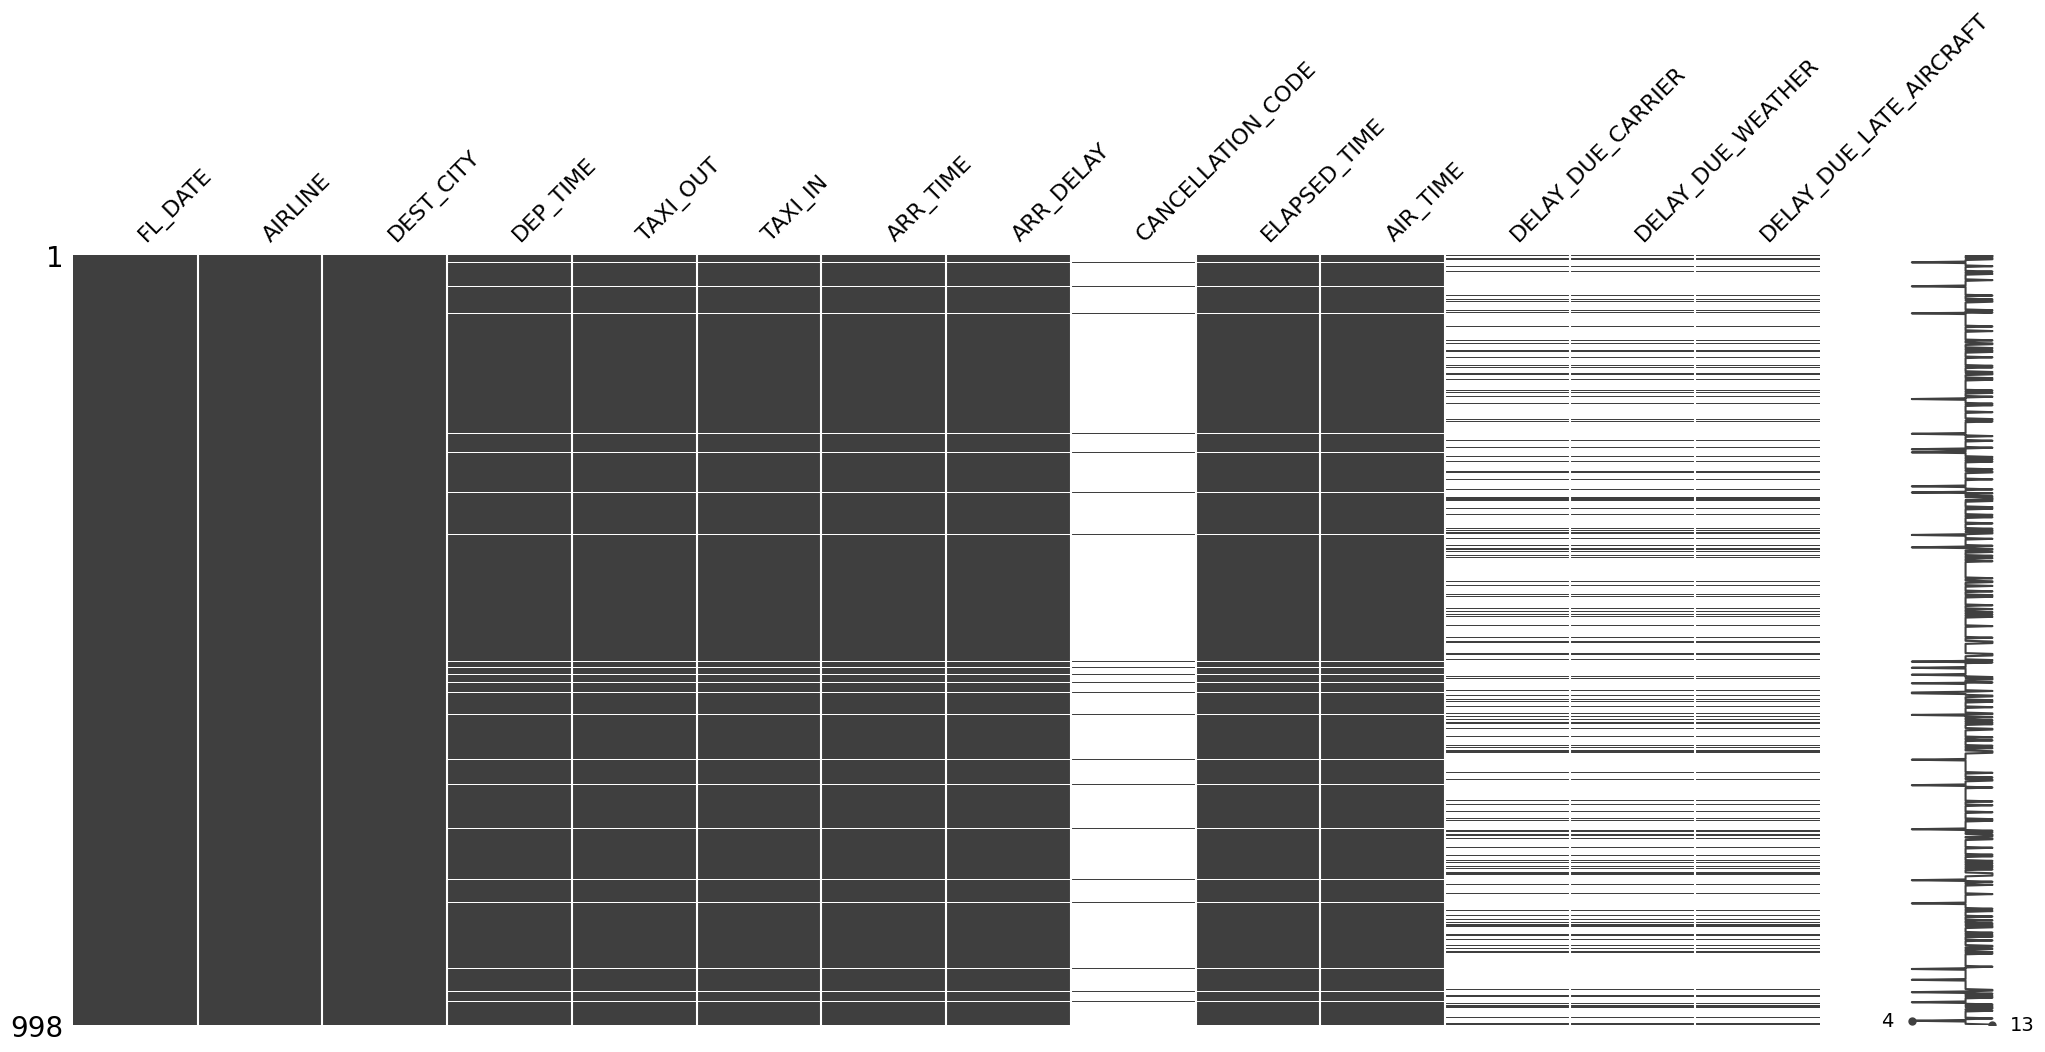

In [6]:
msno.matrix(df)

*   From here also we can see that all the columns are related to each other, So result of MCAR test must be negative.



#Data Transformation

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {
    column: LabelEncoder().fit(df[column])
    for column in df.select_dtypes(include=['object']).columns
}

for column, encoder in label_encoders.items():
    df[column] = encoder.transform(df[column])

df.head()

,FL_DATE,AIRLINE,DEST_CITY,DEP_TIME,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY,CANCELLATION_CODE,ELAPSED_TIME,AIR_TIME,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_LATE_AIRCRAFT
0,671,3,126,1608.0,27.0,9.0,1853.0,24.0,4,285.0,249.0,0.0,8.0,215.0
1,381,16,36,1838.0,15.0,14.0,2040.0,-1.0,4,182.0,153.0,NaN,NaN,NaN
2,597,15,104,1237.0,15.0,3.0,1331.0,141.0,4,54.0,36.0,141.0,0.0,0.0
3,61,2,16,1001.0,23.0,8.0,1130.0,-29.0,4,89.0,58.0,NaN,NaN,NaN
4,722,13,149,1637.0,22.0,41.0,2008.0,23.0,4,151.0,88.0,57.0,0.0,0.0


# MCAR test

In [8]:
!pip install missingpy

In [9]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.9 MB 3.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.9 MB 3.4 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 3.3 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 3.3 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 3.2 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 3.3 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 3.3 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.9 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 3.4 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.9 MB 3.4 MB/s eta 0:00:01
   -----------------------

In [10]:
import numpy as np
from statsmodels.stats import weightstats as stests
from scipy.stats import chi2

def little_mcar_test(df):
    n = df.shape[0]
    n_miss = df.isnull().sum().sum()

    proportions_missing = df.isnull().mean()

    chi_square = (n_miss ** 2) / ((n - 1) * proportions_missing.sum())

    df_m = df.shape[1] - 1

    p_value = 1 - chi2.cdf(chi_square, df_m)

    return chi_square, p_value

chi_square, p_value = little_mcar_test(df)
print(f"Chi-Square Statistic: {chi_square}")
print(f"P-Value for MCAR test: {p_value}")

Chi-Square Statistic: 2640.64593781344
P-Value for MCAR test: 0.0


* P-value is 0 means, our missing data is **not MCAR**




# KNN Imputer to fill missing values

In [11]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
df_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)
print(df_imputed_knn.head())

   FL_DATE  AIRLINE  DEST_CITY  DEP_TIME  TAXI_OUT  TAXI_IN  ARR_TIME  \
0    671.0      3.0      126.0    1608.0      27.0      9.0    1853.0   
1    381.0     16.0       36.0    1838.0      15.0     14.0    2040.0   
2    597.0     15.0      104.0    1237.0      15.0      3.0    1331.0   
3     61.0      2.0       16.0    1001.0      23.0      8.0    1130.0   
4    722.0     13.0      149.0    1637.0      22.0     41.0    2008.0   

   ARR_DELAY  CANCELLATION_CODE  ELAPSED_TIME  AIR_TIME  DELAY_DUE_CARRIER  \
0       24.0                4.0         285.0     249.0                0.0   
1       -1.0                4.0         182.0     153.0                4.0   
2      141.0                4.0          54.0      36.0              141.0   
3      -29.0                4.0          89.0      58.0               31.8   
4       23.0                4.0         151.0      88.0               57.0   

   DELAY_DUE_WEATHER  DELAY_DUE_LATE_AIRCRAFT  
0                8.0                    215.

In [12]:
print(df_imputed_knn.isnull().sum())

FL_DATE                    0
AIRLINE                    0
DEST_CITY                  0
DEP_TIME                   0
TAXI_OUT                   0
TAXI_IN                    0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLATION_CODE          0
ELAPSED_TIME               0
AIR_TIME                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64


*   This code is replace missing values in a dataset with estimates based on similar data points (using K-nearest neighbors).
*   After executing this code, df_imputed_knn will contain the
original data with missing values filled in

# MissForest Imputer to fill missing values

In [13]:
# missingpy inbuilt function is not working so we use basic code for implimentation
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

def custom_missforest(df, n_iterations=10):
    df_imputed = df.copy()

    for _ in range(n_iterations):
        for column in df_imputed.columns:
            if df_imputed[column].isnull().any():
                df_missing = df_imputed[df_imputed[column].isnull()]
                df_non_missing = df_imputed[df_imputed[column].notnull()]

                if df_non_missing.empty:
                    continue

                X_train = df_non_missing.drop(columns=column)
                y_train = df_non_missing[column]
                X_test = df_missing.drop(columns=column)

                X_train = X_train.fillna(X_train.mean())
                X_test = X_test.fillna(X_train.mean())

                if y_train.dtype == 'object' or df_imputed[column].dtype == 'object':
                    model = RandomForestClassifier(n_estimators=100)
                    model.fit(X_train, y_train)
                    df_imputed.loc[df_imputed[column].isnull(), column] = model.predict(X_test)
                else:
                    model = RandomForestRegressor(n_estimators=100)
                    model.fit(X_train, y_train)
                    df_imputed.loc[df_imputed[column].isnull(), column] = model.predict(X_test)

    return df_imputed

df_imputed_missforest = custom_missforest(df)

print("Imputed DataFrame:")
print(df_imputed_missforest)

Imputed DataFrame:
     FL_DATE  AIRLINE  DEST_CITY  DEP_TIME  TAXI_OUT  TAXI_IN  ARR_TIME  \
0        671        3        126    1608.0      27.0      9.0    1853.0   
1        381       16         36    1838.0      15.0     14.0    2040.0   
2        597       15        104    1237.0      15.0      3.0    1331.0   
3         61        2         16    1001.0      23.0      8.0    1130.0   
4        722       13        149    1637.0      22.0     41.0    2008.0   
..       ...      ...        ...       ...       ...      ...       ...   
993      608        3          8     557.0      13.0      9.0     740.0   
994       71        3        135     554.0      19.0      6.0     807.0   
995      103        2         82     559.0      16.0      6.0     910.0   
996      127       15         10     909.0      14.0      3.0    1421.0   
997      662       14        126    1719.0      23.0     10.0    1854.0   

     ARR_DELAY  CANCELLATION_CODE  ELAPSED_TIME  AIR_TIME  DELAY_DUE_CARRIER  \


In [14]:
df_imputed_missforest.isnull().sum()

FL_DATE                    0
AIRLINE                    0
DEST_CITY                  0
DEP_TIME                   0
TAXI_OUT                   0
TAXI_IN                    0
ARR_TIME                   0
ARR_DELAY                  0
CANCELLATION_CODE          0
ELAPSED_TIME               0
AIR_TIME                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_LATE_AIRCRAFT    0
dtype: int64



*   Missing entries are replaced with estimated values based on predictions made by random forest models. These values are derived from other observed data in the dataset.
* If we run the code multiple times, we might see slight variations due to the randomness in the random forest model, especially if using a bootstrap approach for training the trees.

